In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

DATA_PATH = '/root/Workspace/DataLake/stMary'
DATA_PATH2 = '/root/Workspace/Project-RRpo-2ndStudy/dataset/230920'

In [2]:
stmary_fast = np.load(f'{DATA_PATH2}/stmary-preprocessed_fastRR.npy', allow_pickle=True)
stmary_normal = np.load(f'{DATA_PATH2}/stmary-preprocessed_normalRR.npy', allow_pickle=True)
stmary_slow = np.load(f'{DATA_PATH2}/stmary-preprocessed_slowRR.npy', allow_pickle=True)
print(stmary_fast.shape, stmary_normal.shape, stmary_slow.shape)

(48, 2) (35, 2) (17, 2)


In [3]:
sel_fast_id = stmary_fast[40][0]; sel_fast_rr = round(np.mean([stmary_fast[40][1][i,1] for i in range(len(stmary_fast[40][1]))]))
sel_normal_id = stmary_normal[13][0]; sel_normal_rr = round(np.mean([stmary_normal[13][1][i,1] for i in range(len(stmary_normal[13][1]))]))
sel_slow_id = stmary_slow[10][0]; sel_slow_rr = round(np.mean([stmary_slow[10][1][i,1] for i in range(len(stmary_slow[10][1]))]))

In [4]:
pleth_fast = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
pleth_normal = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
pleth_slow = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
print(pleth_fast.shape, pleth_normal.shape, pleth_slow.shape)

(16160,) (15808,) (16224,)


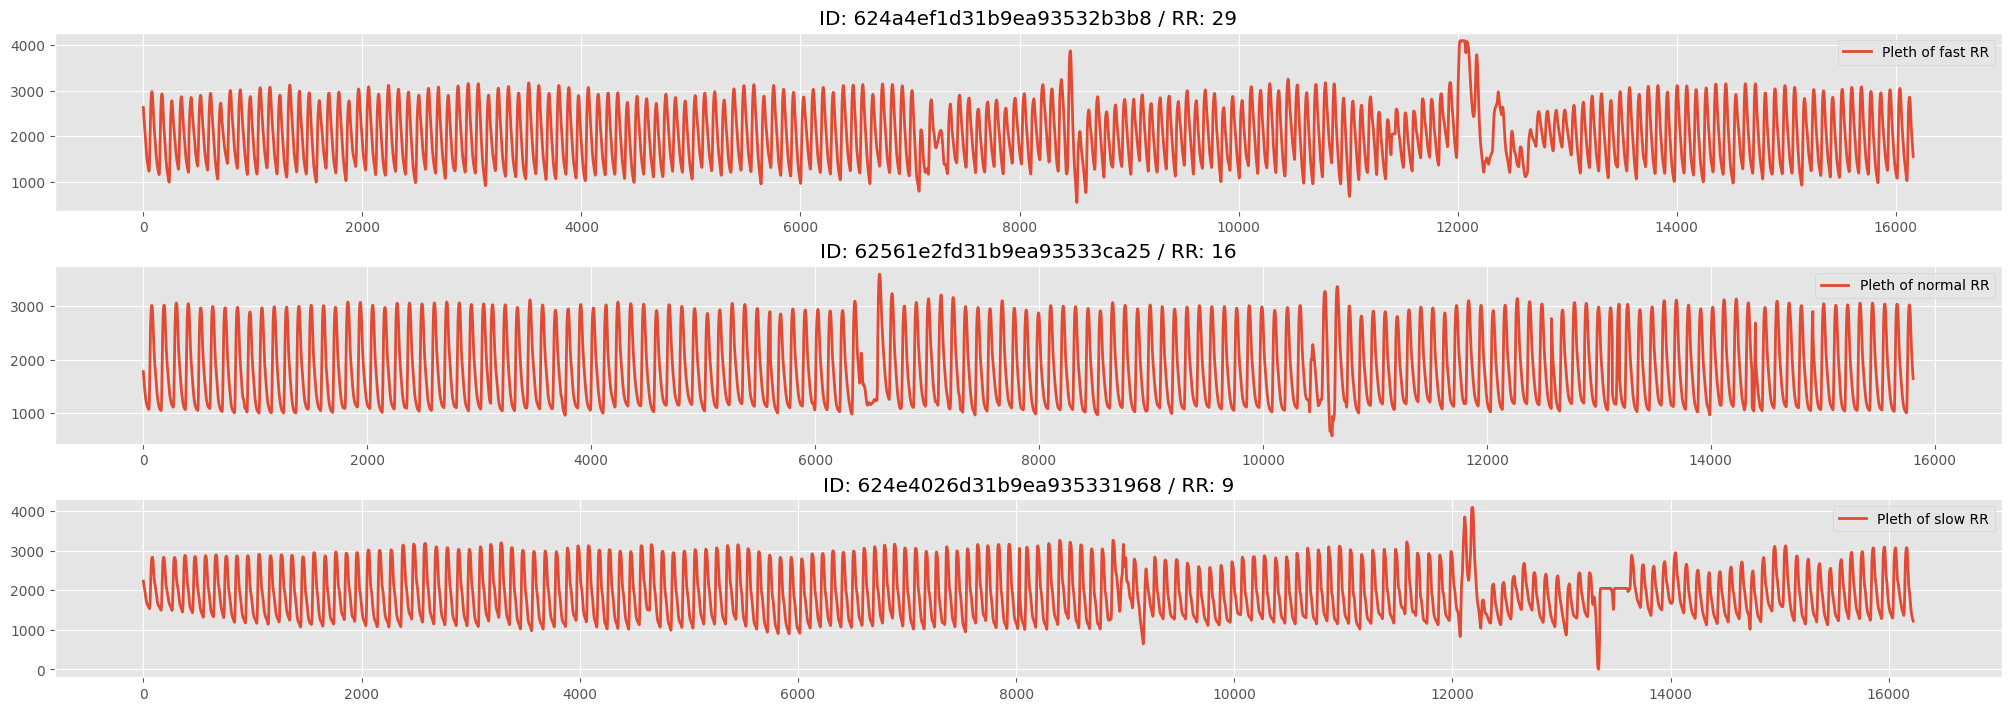

In [7]:
fig, axs = plt.subplots(3,1,figsize=(20,7), constrained_layout=True)
axs[0].plot(pleth_fast, linewidth=2, label='Pleth of fast RR')
axs[0].set_title(f'ID: {sel_fast_id} / RR: {sel_fast_rr}')
axs[1].plot(pleth_normal, linewidth=2, label='Pleth of normal RR')
axs[1].set_title(f'ID: {sel_normal_id} / RR: {sel_normal_rr}')
axs[2].plot(pleth_slow, linewidth=2, label='Pleth of slow RR')
axs[2].set_title(f'ID: {sel_slow_id} / RR: {sel_slow_rr}')
for i in range(3): axs[i].legend()
plt.show()